Inspiration: https://machinelearningmastery.com/building-an-image-classifier-with-a-single-layer-neural-network-in-pytorch/    
Building an Image Classifier with a Single-Layer Neural Network in PyTorch

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# import the CIFAR-10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:01<00:00, 94253887.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [21]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 100) # Fully connected layer with 100 hidden neurons
        self.fc2 = nn.Linear(100, num_classes) # Fully connected layer with num_classes outputs

    def forward(self, x):
        x = x.view(-1, 32*32*3) # reshape the input tensor
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

In [22]:
# Instantiate the model
model = SimpleNet()

In [ ]:
# for m in model.parameters():
#   # for n in m:
#   #   print(n.shape)
#   # print(m.shape,'\n')

In [23]:
# Load the data into PyTorch DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
# train the model
num_epochs = 20
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

# Loop through the number of epochs
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    # set model to train mode
    model.train()
    # iterate over the training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #compute the loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # increment the running loss and accuracy
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    # calculate the average training loss and accuracy
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc /= len(train_loader.dataset)
    train_acc_history.append(train_acc)

    # set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.argmax(1) == labels).sum().item()

    # calculate the average validation loss and accuracy
    val_loss /= len(test_loader)
    val_loss_history.append(val_loss)
    val_acc /= len(test_loader.dataset)
    val_acc_history.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

Epoch 1/20, train loss: 1.8781, train acc: 0.3257, val loss: 1.7450, val acc: 0.3848
Epoch 2/20, train loss: 1.7094, train acc: 0.3904, val loss: 1.6756, val acc: 0.3973
Epoch 3/20, train loss: 1.6477, train acc: 0.4125, val loss: 1.6378, val acc: 0.4181
Epoch 4/20, train loss: 1.6089, train acc: 0.4263, val loss: 1.6140, val acc: 0.4279
Epoch 5/20, train loss: 1.5842, train acc: 0.4368, val loss: 1.5851, val acc: 0.4291
Epoch 6/20, train loss: 1.5576, train acc: 0.4461, val loss: 1.5772, val acc: 0.4332
Epoch 7/20, train loss: 1.5414, train acc: 0.4529, val loss: 1.6224, val acc: 0.4218
Epoch 8/20, train loss: 1.5240, train acc: 0.4572, val loss: 1.5453, val acc: 0.4412
Epoch 9/20, train loss: 1.5103, train acc: 0.4625, val loss: 1.6966, val acc: 0.4065
Epoch 10/20, train loss: 1.4970, train acc: 0.4652, val loss: 1.5515, val acc: 0.4475
Epoch 11/20, train loss: 1.4841, train acc: 0.4715, val loss: 1.5258, val acc: 0.4506
Epoch 12/20, train loss: 1.4751, train acc: 0.4743, val loss: 1

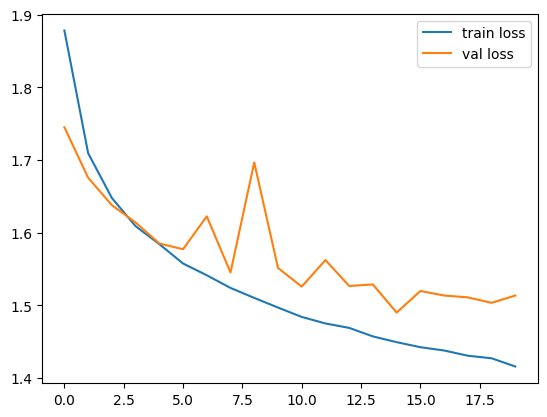

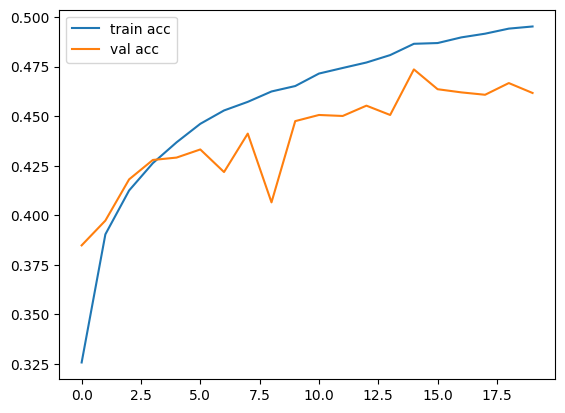

In [25]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(train_loss_history, label='train loss')
plt.plot(val_loss_history, label='val loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_acc_history, label='train acc')
plt.plot(val_acc_history, label='val acc')
plt.legend()
plt.show()

True Labels:  tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])
Predicted Labels:  tensor([3, 9, 0, 0, 4, 6, 3, 6, 3, 1, 8, 9, 5, 0, 1, 8, 7, 0, 8, 6, 9, 2, 0, 9,
        4, 6, 6, 2, 9, 6, 6, 4, 4, 6, 9, 1, 3, 9, 9, 8, 0, 6, 3, 6, 0, 9, 3, 7,
        7, 6, 9, 2, 6, 3, 8, 8, 7, 8, 3, 4, 7, 3, 7, 5])


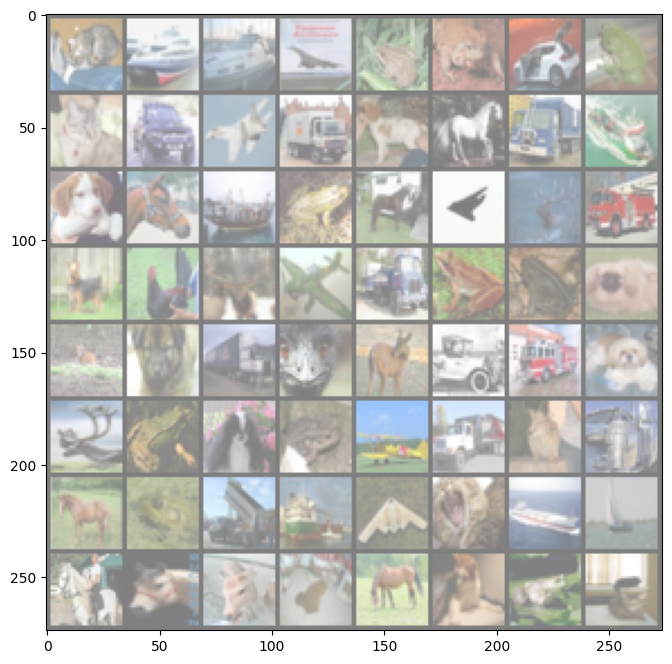

In [27]:
import numpy as np

# get some validation data
for inputs, labels in test_loader:
    break  # this line stops the loop after the first iteration

# make predictions
outputs = model(inputs)
_, predicted = torch.max(outputs, 1)

# display the images and their labels
img_grid = torchvision.utils.make_grid(inputs)
img_grid = img_grid / 2 + 0.5     # unnormalize
npimg = img_grid.numpy()

plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(npimg, (1, 2, 0)))

print('True Labels: ', labels)
print('Predicted Labels: ', predicted)